# scqubits example: zero-pi qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

Set up Matplotlib for plotting into notebook, and import scqubits and numpy:

In [1]:
import numpy as np
import scqubits as scq

# $0$-$\pi$ qubit (decoupled from $\zeta$-mode)

The ideal $0$-$\pi$ circuit has an identical pair of capacitors, an identical pair of linear inductors and an identical pair of Josephson junctions (including paracitic capacitances). The circuit has three modes: a transmon-like $\theta$-mode, a fluxonium-like $\phi$-mode and a spurious harmonic oscillator $\zeta$-mode. When is no disorder (asymmetry) in the capacitor pairs or the inductor pairs, the $\zeta$-mode is decoupled from the rest two. When the small disorder in the junction capacitances and junction energies are taken into account in first order, the Hamiltonian for the $0$-$\pi$ circuit decoupled from the $\zeta$-mode is
\begin{align*}
H_{\phi,\theta}&=-2E_\text{CJ}\partial_\phi^2+2E_{\text{C}\Sigma}(i\partial_\theta-n_g)^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J} \\
&+2E_{C\Sigma}dC_J\,\partial_\phi\partial_\theta + E_J dE_J \sin\theta\sin(\phi-\phi_\text{ext}/2),
\end{align*}
where $\varphi_{\text{ext}} = 2\pi\Phi_{\text{ext}}/\Phi_0$ is the reduced external magnetic flux, the diorder of parasitic capacitances and junction energies are defined as $dC_J = 2(C_{J1} - C_{J2})/(C_{J1}+C_{J2})$ and $dE_J = 2(E_{J1} - E_{J2})/(E_{J1}+E_{J2})$.

<br>

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
zero_pi = scq.ZeroPi.create()

Row(children=[Row(children=[ValidatedNumberField(class_='ml-2 py-0', dense=True, error=False, filled=True, lab…

**Programmatic creation**

The diagonlization of $0$-$\pi$ proceeds in a hybrid basis, using the charge basis for $\theta$ and discretization over an interval for $\phi$. (The latter explains the need for providing grid parameters.)

In [3]:
zero_pi = scq.ZeroPi(
    # reminder: the parameters for generating a 1D grid are (min_value, max_value, num_grid_points)
    grid = scq.Grid1d(-6*np.pi, 6*np.pi, 200), 
    EJ   = 10.0,
    EL   = 0.04,
    ECJ  = 20.0,
    EC = 0.04,
    ng   = 0.1,
    flux = 0.23,
    ncut = 30
)

In [4]:
print(zero_pi)

ZeroPi--------------| [ZeroPi_2]
                    | EJ: 10.0
                    | EL: 0.04
                    | ECJ: 20.0
                    | EC: 0.04
                    | dEJ: 0.0
                    | dCJ: 0.0
                    | ng: 0.1
                    | flux: 0.23
                    | ncut: 30
                    | truncated_dim: 6
                    |
                    | dim: 12200



Just like other qubits implemented in scqubits, parameters of $0$-$\pi$ can be modified by either assigning values to the corresponding attributes, or through modifying values in the above GUI.

In [5]:
zero_pi.flux = 0.31

An interesting alternative way to specify capacitive energies is to provide $E_{CJ}$ and $E_{C\Sigma}$ (the latter corresponds to the optional argument `ECS`) during the initialization. The $E_C$ value can also be changed by providing an $E_{C\Sigma}$ value in the following way:

In [6]:
zero_pi.set_EC_via_ECS(0.04)
zero_pi.EC

0.04008016032064128

## Computing and plotting eigenenergies and wavefunctions

**Eigenenergies.** Similar to other qubits, eigenvalue computations and parameter sweeps can be performed using the following methods:

In [7]:
zero_pi.eigenvals(evals_count=10)

array([17.00199548, 17.02238769, 18.12303267, 18.14028472, 18.72257217,
       18.93090846, 19.16555977, 19.18024366, 19.92838159, 20.0925804 ])

Spectral data:   0%|          | 0/27 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

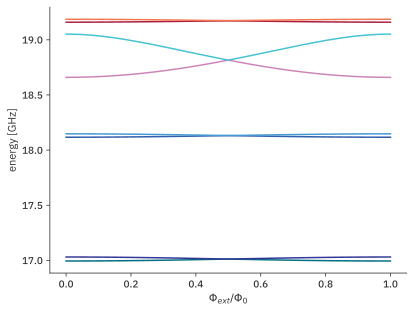

In [8]:
flux_list = np.linspace(0, 1, 27)
zero_pi.plot_evals_vs_paramvals(param_name='flux', param_vals=flux_list, evals_count=8)

**Matrix elements.** Similar to other qubits, matrix elements can be obtained and visualized as follows:

In [29]:
zero_pi.matrixelement_table(operator="n_theta_operator")

array([[-9.99999988e-02, -9.08155057e-06, -1.87089570e+00,
        -7.30546369e-03,  4.15189011e-06,  2.86984696e-08],
       [-9.08155057e-06, -1.00000001e-01, -7.32661152e-03,
         1.86834885e+00, -4.92300440e-09, -9.44249251e-06],
       [-1.87089570e+00, -7.32661152e-03, -9.99969195e-02,
        -4.23068292e-04, -1.11223943e-05, -8.48295183e-02],
       [-7.30546369e-03,  1.86834885e+00, -4.23068292e-04,
        -1.00003433e-01, -2.67073860e-02, -8.42335338e-04],
       [ 4.15189011e-06, -4.92300441e-09, -1.11223943e-05,
        -2.67073860e-02, -9.99999966e-02,  7.37293731e-07],
       [ 2.86984696e-08, -9.44249251e-06, -8.48295183e-02,
        -8.42335338e-04,  7.37293731e-07, -9.99999360e-02]])

(<Figure size 720x360 with 3 Axes>, (<Axes3DSubplot:>, <AxesSubplot:>))

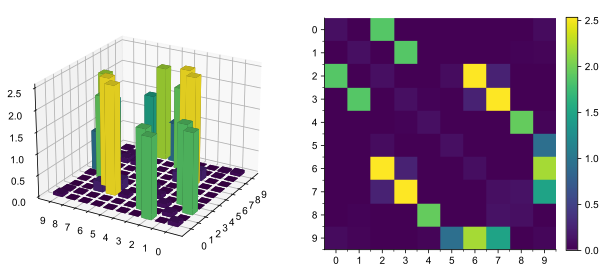

In [30]:
zero_pi.plot_matrixelements(operator='n_theta_operator', evals_count=10)

Spectral data:   0%|          | 0/27 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='matrix element'>)

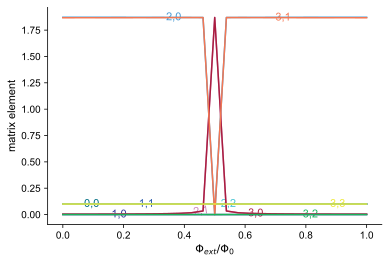

In [31]:
zero_pi.plot_matelem_vs_paramvals(operator='n_theta_operator', param_name='flux', param_vals=flux_list)

**Plot wavefunctions.** 

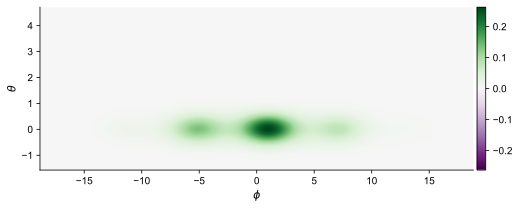

In [32]:
fig, ax = zero_pi.plot_wavefunction(which=0, mode='real', zero_calibrate=True)

(<Figure size 576x216 with 2 Axes>,
 <AxesSubplot:xlabel='$\\phi$', ylabel='$\\theta$'>)

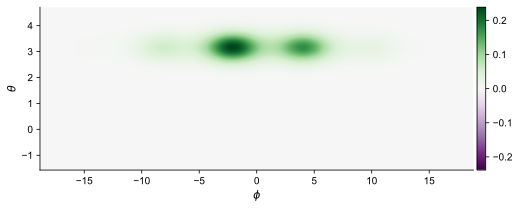

In [33]:
zero_pi.plot_wavefunction(which=1, mode='real', zero_calibrate=True)

**Visualizing potentials.**

(<Figure size 576x96 with 2 Axes>,
 <AxesSubplot:xlabel='$\\phi$', ylabel='$\\theta$'>)

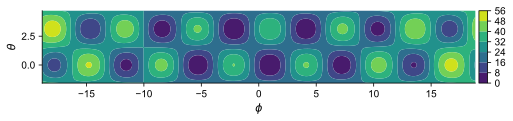

In [17]:
zero_pi.plot_potential()

# Full $0$-$\pi$ qubit (incl. $\zeta$-mode)

When there is disorder in the capacitor pairs and/or the inductor pairs, the $\zeta$-mode couples to $\theta$ and/or $\phi$-mode. To accurately obtain spectral properties of such circuit, all three modes need to be taken into account. Taking all the disorder into account in the first order, the Hamiltonian for the full $0$-$\pi$ circuit is:
\begin{align*}
H&= H_{\theta,\phi} + H_{\zeta} + H_{\text{int}},\\
H_{\zeta}&= \omega_\zeta a^\dagger a,\\
H_{\text{int}}&= 2E_{\text C \Sigma } dC \partial_\theta \partial_\eta + E_{\text L} dE_{\text L} \phi\zeta,
\end{align*}
where disorder in the capacitors and the inductors are defined as $dC = 2(C_{1} - C_{2})/(C_{1}+C_{2})$ and $dL = 2(L_{1} - L_{2})/(L_{1}+L_{2})$.

<br>

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [34]:
full_zpi = scq.FullZeroPi.create()

Output()

In [35]:
print(full_zpi)

FullZeroPi----------| [FullZeroPi_1]
                    | EJ: 10.0
                    | EL: 0.04
                    | ECJ: 20.0
                    | EC: 0.04
                    | dEJ: 0.05
                    | dCJ: 0.05
                    | dC: 0.08
                    | dEL: 0.05
                    | ng: 0.1
                    | flux: 0.23
                    | ncut: 30
                    | zeropi_cutoff: 10
                    | zeta_cutoff: 40
                    | truncated_dim: 10
                    |
                    | dim: 400   --[ (theta, phi): 21960 total, 10 truncated;  (zeta): 40 ]--



Notice that four basis cutoffs need to be specified: `ncut`, `zeropi_cutoff`, `zeta_cutoff` and `grid`. The full circuit is treated as a composite system made by subsystems with Hamiltonians $H_{\theta, \phi}$ and $H_\zeta$, and their interactions $H_{\text{int}}$. The diagonalization of the full $0$-$\pi$ is carried out using hierarchical diagonalization with the following steps: 
1. The symmetric $0$-$\pi$ Hamiltonian $H_{\theta,\phi}$ is diagonalized using the hybrid basis; the basis is specified using `ncut` and `grid`.
2. The $\zeta$-mode Hamiltonian $H_{\zeta}$ is a harmonic oscillator Hamiltonian; its spectrum is obtained directly without performing numerical diagonalization.
3. From the resulting lowest energy eigenstates of $H_{\theta,\phi}$ and $H_\zeta$, the lowest `zeropi_cutoff` and `zeta_cutoff` energy eigenstates of the respective subsystems are kept. A basis for the full circuit is obtained by taking tensor products of these subsystem eigenstates. 
4. The full circuit Hamiltonian $H$ is represented under the above basis and diagonalized.